## NAVADEEP PASALA
## The Spark Foundation (Graduate Rotational Internship Program)
## Data Science & Business Analytics
## TASK 6 - PREDICTION USING DECISION TREE ALGORITHM

### TASK:
#### - Create the Decision Tree classifier and visualize it graphically.
#### - Dataset : https://bit.ly/3kXTdox

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Load and read the data**

In [100]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Description of the data**

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [102]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Check NULL values**

In [103]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Check for outliers that will spoil the classification model using boxplot.**
**It is evident that the 'sepalwidthcm' has outliers**


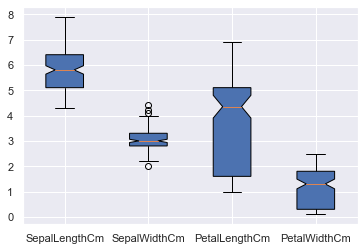

In [104]:
SepalLengthCm = data['SepalLengthCm']
SepalWidthCm = data['SepalWidthCm']
PetalLengthCm = data['PetalLengthCm']
PetalWidthCm = data['PetalWidthCm']

columns = [SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm]

fig,ax = plt.subplots()
ax.boxplot(columns,notch=True,patch_artist=True)
plt.xticks([1,2,3,4],['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
plt.show()

**To remove the in 'sepalwidthcm' , use the inter-quartile range to get the min and max values of the whiskers from the boxplot**

In [ ]:
Q1 = data['SepalWidthCm'].quantile(0.25)
Q3 = data['SepalWidthCm'].quantile(0.75)
IQR = Q3 - Q1

ur = Q3+1.5*IQR
lr = Q1-1.5*IQR

# Now remove the values greater than 'ur' and lesser than 'lr'
samp = data.index[data['SepalWidthCm'] > ur]
samp.append(data.index[data['SepalWidthCm'] < lr])
data = data.drop(samp)
data.reset_index(drop=True)

**Split dataset for training and testing**

In [106]:
df = data.copy()
x = df.iloc[:,1:5]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

**Perform the decision tree classification and then find the predicted values using the testing dataset**

In [133]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

**Check the accuracy achieved by the model in the testing dataset**

In [135]:
accuracy = accuracy_score(y_test,y_pred)
accuracy*100

97.2972972972973

**Compare the actual and predicted values by creating a dataframe**

In [ ]:
data = {'y_Actual': y_test,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data)
df.reset_index(inplace = True, drop = True)
df.head()

**Create and visualize a confusion matrix by using crosstable and heatmap**

In [121]:
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica
Actual                                                       
Iris-setosa               14                0               0
Iris-versicolor            0                9               1
Iris-virginica             0                0              13


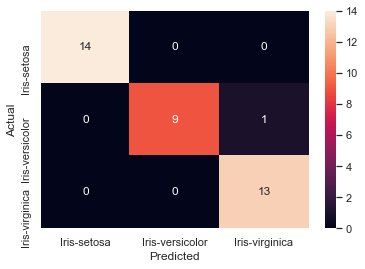

In [122]:
sns.heatmap(confusion_matrix, annot=True)
plt.show()

**Plot the decision tree model using sklearn.tree.plot_tree and then save the png image**

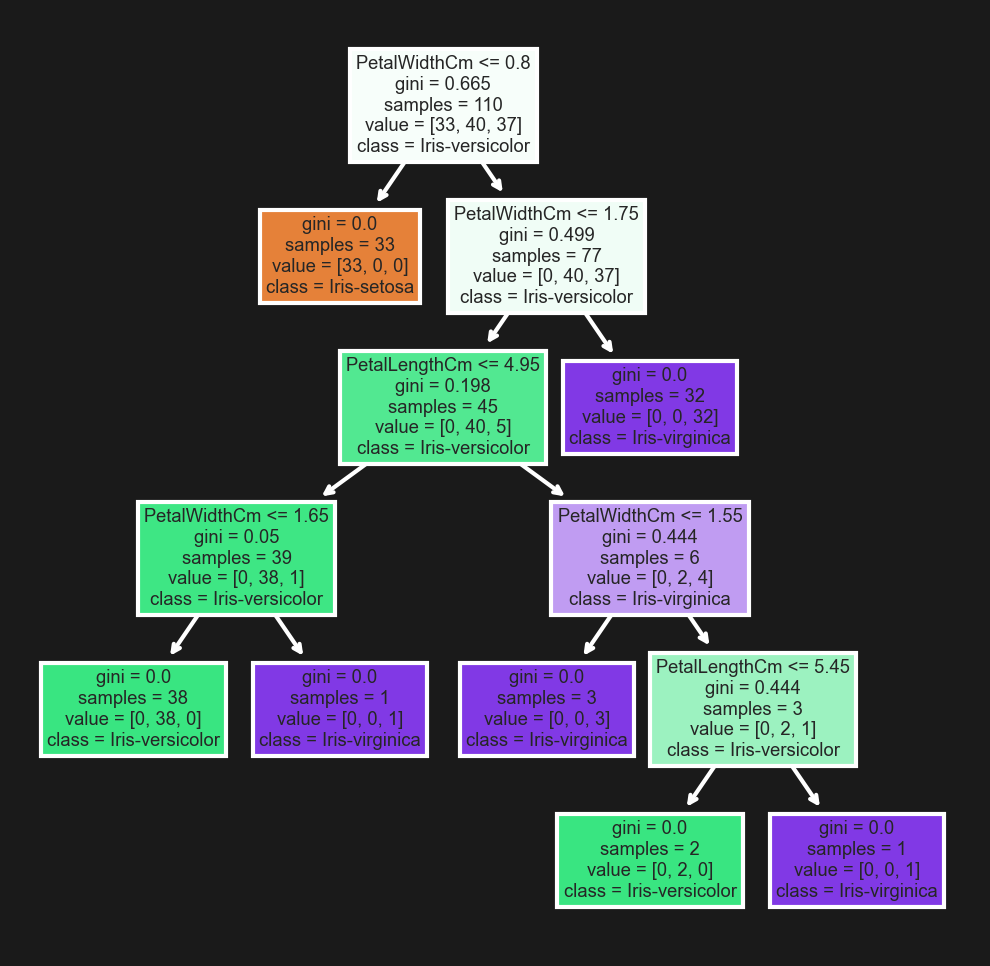

In [129]:
from sklearn import tree
feature_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
class_names = ['Iris-setosa','Iris-versicolor','Iris-virginica']
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300,facecolor='k')
tree.plot_tree(clf,feature_names=feature_names,class_names=class_names,filled=True);
fig.savefig('IrisTree.png')

# Predict the probability of the new data belonging to a particular class

In [131]:
clf.predict_proba([[4.7,3.2,1.3,0.2]])

array([[1., 0., 0.]])

# Predict the class of the new data

In [132]:
clf.predict([[4.7,3.2,1.3,0.2]])

array(['Iris-setosa'], dtype=object)

# <center> Conclusion
# Hence, the Decision Tree Model has been created and visualized with the Accuracy of 97.29% in the Test dataset.
# It also predict the class of the new data successfully.